**Identifying characteristics of fake Instagram accounts**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


**Load the dataset**

In [2]:
data = pd.read_csv("dataset_numeric.csv") 
data

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,emoji_avg_sentiment_score,emoji_avg_neutrality,is_fake
0,0.004132,0.035150,0.461538,1.000000,0.633333,0.0,0.0,1.0,0.649123,0.628563,0.0
1,0.096508,0.023284,0.115385,0.266667,0.886667,0.0,0.0,1.0,0.609409,0.707267,0.0
2,0.133831,0.020134,0.653846,0.366667,0.960000,0.0,0.0,0.0,0.770770,0.583072,0.0
3,0.052519,0.022462,0.076923,0.800000,0.766667,0.0,0.0,0.0,0.333333,0.000000,0.0
4,0.037723,0.015384,0.346154,0.500000,0.940000,0.0,0.0,1.0,0.333333,0.090110,0.0
...,...,...,...,...,...,...,...,...,...,...,...
471,0.376433,0.000007,0.423077,0.166667,0.173333,0.0,0.0,0.0,0.887197,0.438440,1.0
472,0.112637,0.000013,0.230769,0.233333,0.366667,1.0,0.0,0.0,0.333333,0.000000,1.0
473,0.544122,0.000009,0.153846,0.233333,0.746667,1.0,0.0,1.0,0.662651,0.396165,1.0
474,0.244468,0.000153,0.692308,0.566667,0.253333,0.0,0.0,0.0,0.658635,0.406144,1.0


**Inspecting Fake Accounts**

In [3]:
fake_rows = data[data['is_fake'] == 1]
fake_rows

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,emoji_avg_sentiment_score,emoji_avg_neutrality,is_fake
238,0.982671,0.000021,0.423077,0.200000,0.500000,0.0,0.0,0.0,0.797300,0.538736,1.0
239,0.232871,0.000007,0.269231,0.100000,0.053333,1.0,0.0,1.0,0.333333,0.000000,1.0
240,0.152359,0.000022,0.230769,0.000000,0.900000,0.0,0.0,0.0,0.333333,0.000000,1.0
241,0.661690,0.000108,0.423077,0.266667,0.333333,1.0,0.0,0.0,0.333333,0.000000,1.0
242,0.221674,0.000007,0.153846,0.000000,0.026667,1.0,0.0,0.0,0.753086,0.337912,1.0
...,...,...,...,...,...,...,...,...,...,...,...
471,0.376433,0.000007,0.423077,0.166667,0.173333,0.0,0.0,0.0,0.887197,0.438440,1.0
472,0.112637,0.000013,0.230769,0.233333,0.366667,1.0,0.0,0.0,0.333333,0.000000,1.0
473,0.544122,0.000009,0.153846,0.233333,0.746667,1.0,0.0,1.0,0.662651,0.396165,1.0
474,0.244468,0.000153,0.692308,0.566667,0.253333,0.0,0.0,0.0,0.658635,0.406144,1.0


**Inspecting Real Accounts**

In [4]:
real_rows = data[data['is_fake'] == 0]
real_rows                 

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,emoji_avg_sentiment_score,emoji_avg_neutrality,is_fake
0,0.004132,0.035150,0.461538,1.000000,0.633333,0.0,0.0,1.0,0.649123,0.628563,0.0
1,0.096508,0.023284,0.115385,0.266667,0.886667,0.0,0.0,1.0,0.609409,0.707267,0.0
2,0.133831,0.020134,0.653846,0.366667,0.960000,0.0,0.0,0.0,0.770770,0.583072,0.0
3,0.052519,0.022462,0.076923,0.800000,0.766667,0.0,0.0,0.0,0.333333,0.000000,0.0
4,0.037723,0.015384,0.346154,0.500000,0.940000,0.0,0.0,1.0,0.333333,0.090110,0.0
...,...,...,...,...,...,...,...,...,...,...,...
233,0.043188,0.013013,0.153846,0.466667,0.966667,0.0,0.0,0.0,0.333333,0.000000,0.0
234,0.110237,0.014006,0.192308,0.300000,0.373333,0.0,0.0,0.0,0.444444,0.337912,0.0
235,0.272594,0.012767,0.538462,0.800000,0.680000,1.0,0.0,1.0,0.632332,0.147411,0.0
236,0.037057,0.059216,0.230769,0.333333,0.986667,0.0,0.0,1.0,0.663241,0.513284,0.0


**Identifying the most important features in determining a fake or real instagram account using RFC**

In [5]:
features = data.iloc[:, :10]
target = data.iloc[:, 10]


In [6]:
# Split the data into training and testing sets
F_train, F_test, t_train, t_test = train_test_split(features, target, test_size=0.2, random_state=20)

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=20)

# Train the classifier
rf_classifier.fit(F_train, t_train)

# Make predictions on the test set
t_pred = rf_classifier.predict(F_test)

# Evaluate the accuracy
accuracy = accuracy_score(t_test, t_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get feature importance from trained model
feature_importances0 = rf_classifier.feature_importances_

feature_importance_data0 = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances0})

feature_importance_data0 = feature_importance_data0.sort_values(by='Importance', ascending=False)


print(feature_importance_data0)



Accuracy: 1.00
                     Feature  Importance
1                  followers    0.535393
0                  following    0.251537
5        username_has_number    0.089822
3           full_name_length    0.050902
4         description_length    0.039783
2            username_length    0.011132
8  emoji_avg_sentiment_score    0.009700
9       emoji_avg_neutrality    0.009521
7     description_has_number    0.002044
6       full_name_has_number    0.000166


Due to the model having an accuracy of 1.00, the following steps involve hyperparamter tuning and cross validation to limit the effect of overfitting.

In [7]:

# 1. Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier(random_state=20)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(F_train, t_train)

best_rf_classifier = grid_search.best_estimator_


In [8]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [9]:
# 2. Cross-Validation
cv_scores = cross_val_score(best_rf_classifier, features, target, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]


In [10]:
feature_importances = best_rf_classifier.feature_importances_

feature_importance_data = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)


print(feature_importance_data)


                     Feature  Importance
1                  followers    0.532272
0                  following    0.274589
5        username_has_number    0.089772
4         description_length    0.040595
3           full_name_length    0.037211
9       emoji_avg_neutrality    0.009944
8  emoji_avg_sentiment_score    0.007686
2            username_length    0.006182
7     description_has_number    0.001418
6       full_name_has_number    0.000332


**Feature Importance table**

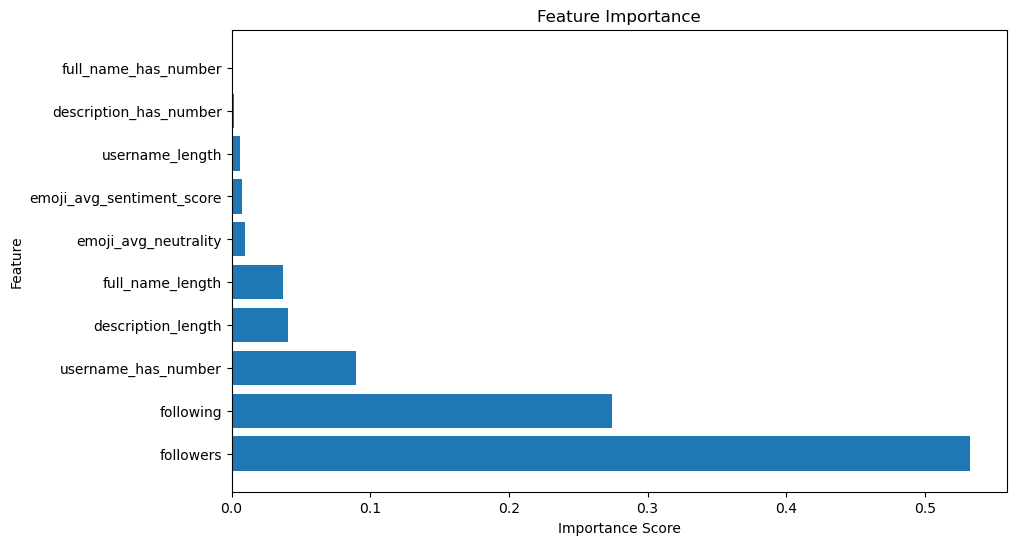

In [11]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_data['Feature'], feature_importance_data['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

**Further Visualisations**

In [12]:
real_accounts_stats = real_rows.describe()
fake_accounts_stats = fake_rows.describe()

In [13]:
real_accounts_stats

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,emoji_avg_sentiment_score,emoji_avg_neutrality,is_fake
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,0.067351,0.085570,0.315126,0.485294,0.606947,0.033613,0.016807,0.264706,0.484351,0.208699,0.0
std,0.092849,0.149848,0.150173,0.209756,0.275298,0.180612,0.128818,0.442106,0.182984,0.246625,0.0
min,0.000000,0.012614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.022894,0.018835,0.230769,0.366667,0.393333,0.000000,0.000000,0.000000,0.333333,0.000000,0.0
50%,0.049853,0.035105,0.307692,0.433333,0.633333,0.000000,0.000000,0.000000,0.408565,0.106726,0.0
75%,0.074280,0.082853,0.384615,0.600000,0.858333,0.000000,0.000000,1.000000,0.630916,0.360440,0.0
max,0.805119,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [14]:
fake_accounts_stats

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,emoji_avg_sentiment_score,emoji_avg_neutrality,is_fake
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,0.410628,0.000094,0.306399,0.283894,0.369888,0.592437,0.088235,0.226891,0.508869,0.170185,1.0
std,0.277898,0.000214,0.129281,0.226962,0.298587,0.492417,0.284235,0.419704,0.223535,0.205094,0.0
min,0.024260,0.000000,0.038462,0.000000,0.013333,0.000000,0.000000,0.000000,0.186916,0.000000,1.0
25%,0.161457,0.000009,0.230769,0.133333,0.120000,0.000000,0.000000,0.000000,0.333333,0.000000,1.0
50%,0.364636,0.000014,0.269231,0.250000,0.286667,1.000000,0.000000,0.000000,0.333333,0.000000,1.0
75%,0.606238,0.000103,0.384615,0.400000,0.596667,1.000000,0.000000,0.000000,0.671540,0.340302,1.0
max,1.000000,0.002073,0.846154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.868917,1.0


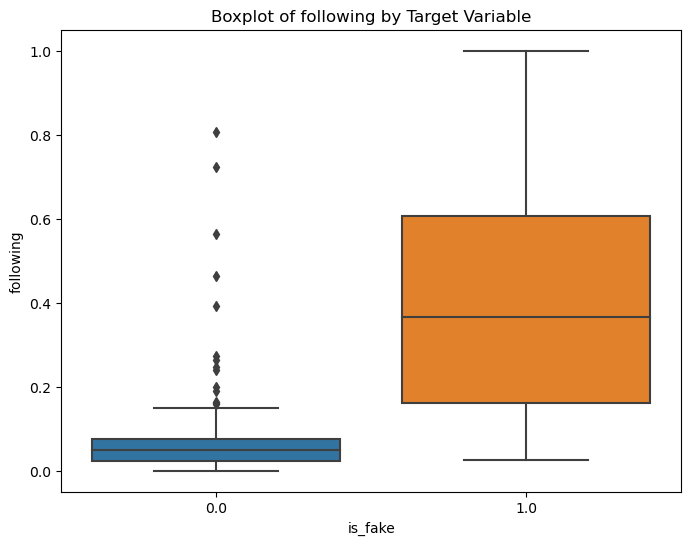

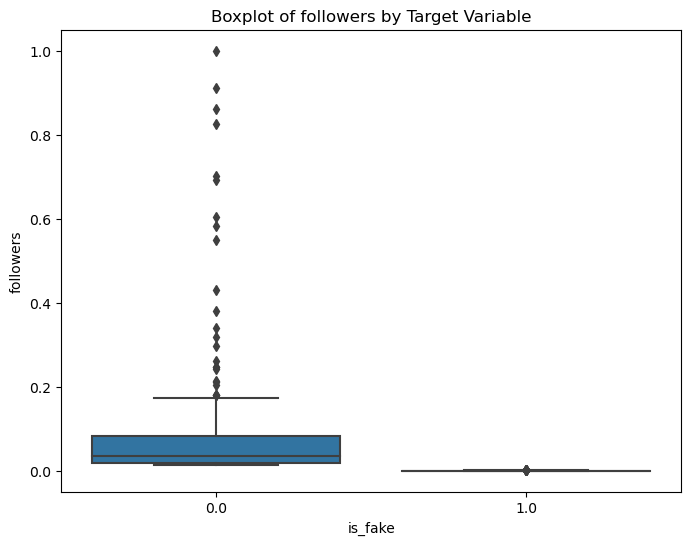

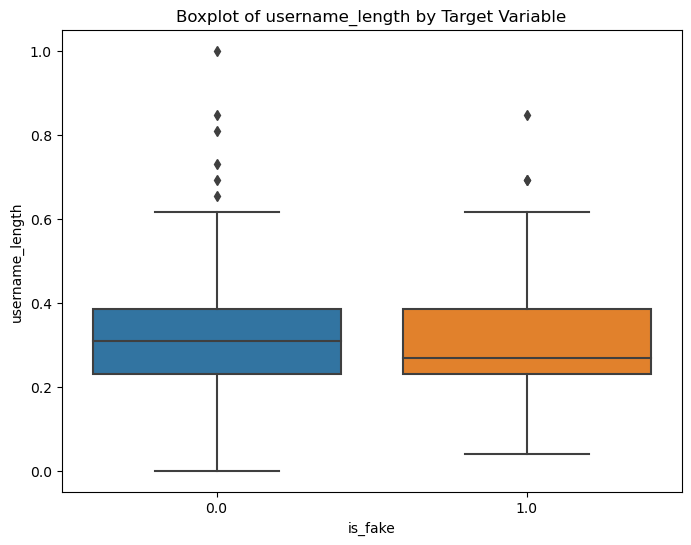

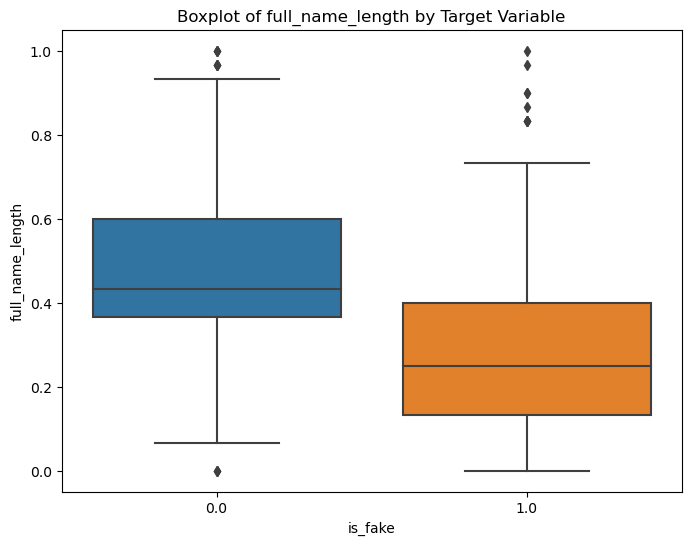

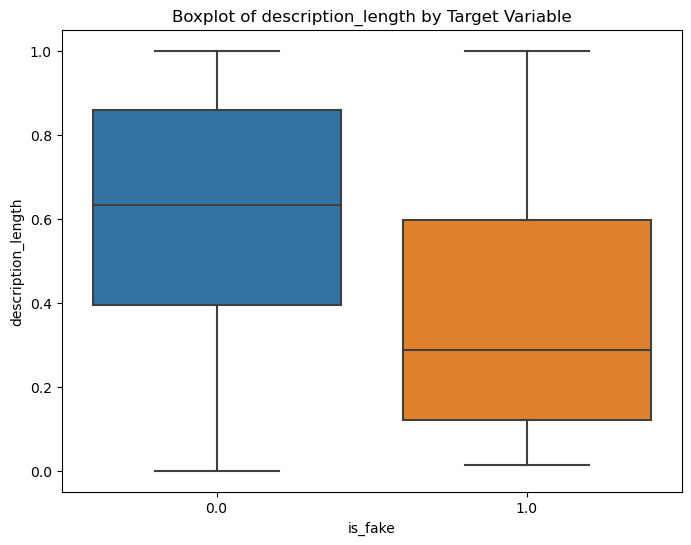

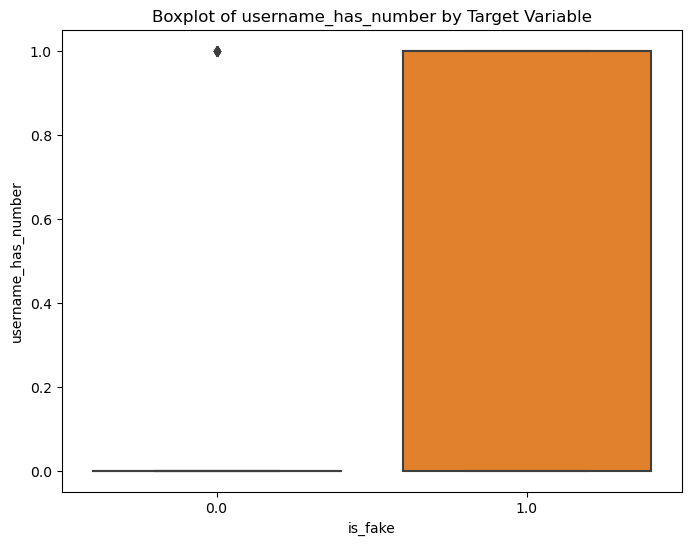

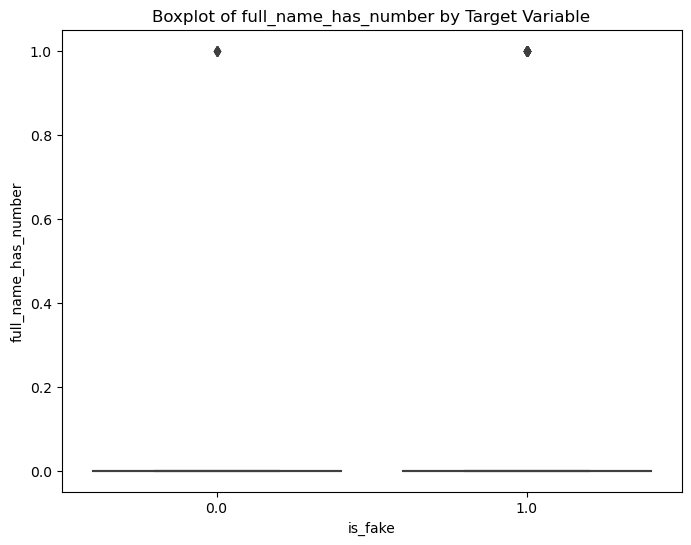

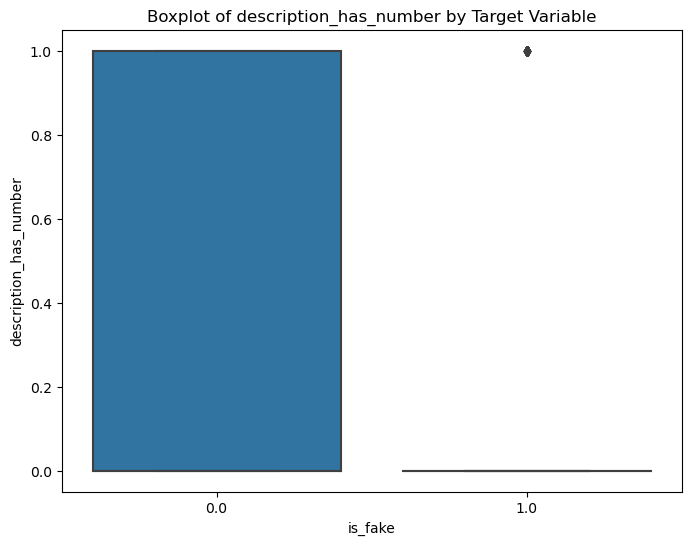

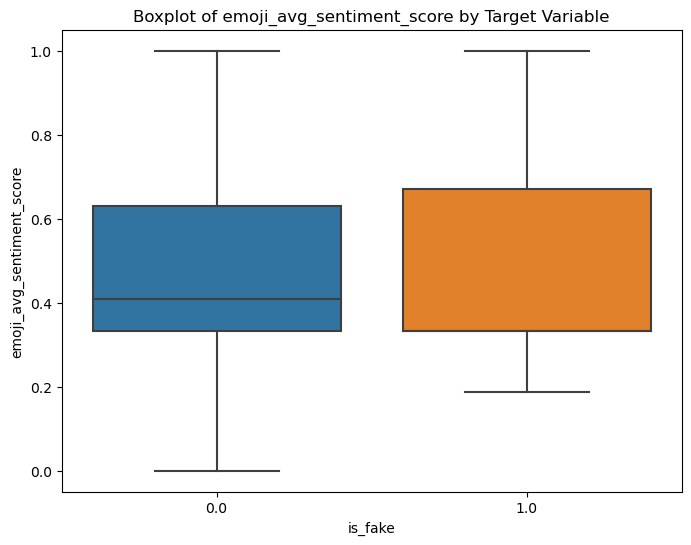

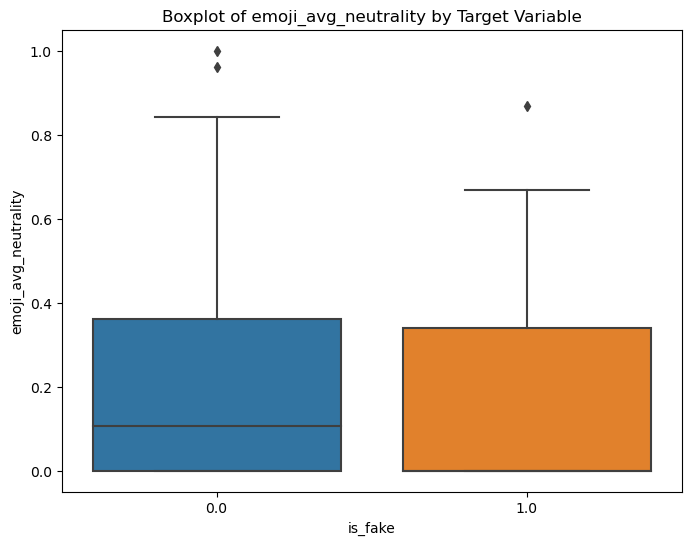

In [18]:

df = pd.concat([features, target], axis=1)


# Boxplots 
for column in features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="is_fake", y=column, data=df)
    plt.title(f"Boxplot of {column} by Target Variable")
    plt.show()

**Statistical T-test**

In [17]:
t_test_results = {}
for column in features.columns:
    fake_values = features.loc[target == 1, column]
    real_values = features.loc[target == 0, column]
    t_stat, p_value = ttest_ind(fake_values, real_values, equal_var=False)
    p_value *= 2
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}
    


for feature, result in t_test_results.items():
    print(f"{feature}: t-statistic={result['t-statistic']}, p-value={result['p-value']}")

following: t-statistic=18.074529556681057, p-value=4.2912128565883084e-49
followers: t-statistic=-8.799930624454253, p-value=5.803295144501407e-16
username_length: t-statistic=-0.6793993435582781, p-value=0.9944476412839125
full_name_length: t-statistic=-10.05371529009033, p-value=2.2593224233637635e-21
description_length: t-statistic=-9.004871998152993, p-value=1.0748327349441161e-17
username_has_number: t-statistic=16.436976487269476, p-value=2.019234392157952e-43
full_name_has_number: t-statistic=3.5311673062965103, p-value=0.0009450049962591387
description_has_number: t-statistic=-0.9569972360183036, p-value=0.6781156121289855
emoji_avg_sentiment_score: t-statistic=1.3093930214210174, p-value=0.38212066503126224
emoji_avg_neutrality: t-statistic=-1.8523385796479266, p-value=0.12923875134579538


Following: reject null hypothesis, so significant difference

Followers: reject null hypothesis, so significant difference

username_length: not reject null hypthesis, no evidence

full_name_length: reject null hypothesis, significant difference

description_length: reject null hypothesis, so significant difference

username_has_number: reject null hypothesis, so significant difference

full_name_has_number: reject null hypothesis, so significant difference

description_has_number: not reject null hypthesis, no evidence

emoji_avg_sentiment_score: not reject null hypothesis, no evidence

emoji_avg_neutrality: not reject null hypothesis, no evidence